In [1]:
import matplotlib.pyplot as plt
import numpy as np
import read_vars_WRF_RAMS
import xarray as xr

In [2]:
# which domain
domain='1'    

# colors for each simulation
colors      = ['#000000','#377eb8', '#56B4E9','#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

#simulation names
simulations = ['PHI2.1-R','PHI1.1-R','AUS1.1-R','USA1.1-R','WPO1.1-R','BRA1.1-R','BRA1.2-R','RSA1.1-R','ARG1.1-R','ARG1.2-R','DRC1.1-R']

# dictionary containing files for each simulation
file_dict_g1 = {'PHI2.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/PHI2.1-R-V0/G3/out_30s/a-A-2019-09-10-153000-g'+'1'+'.h5',
             'PHI1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/PHI1.1-R-V0/G3/out_30s/a-A-2019-09-10-120000-g'+'1'+'.h5',
             'AUS1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/AUS1.1-R-V0/G3/out_30s/a-A-2006-01-23-120000-g'+'1'+'.h5',
             'USA1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/USA1.1-R-V0/G3/out_30s/a-A-2022-09-16-110000-g'+'1'+'.h5',
             'WPO1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/WPO1.1-R-V0/G3/out_30s/a-A-2018-08-28-065000-g'+'1'+'.h5',
             'BRA1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/BRA1.1-R-V0/G3/out_30s/a-A-2014-03-31-190000-g'+'1'+'.h5',
             'BRA1.2-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/BRA1.2-R-V0/G3/out_30s/a-A-2014-04-01-140000-g'+'1'+'.h5',
             'RSA1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/RSA1.1-R-V0/G3/out_30s/a-A-2008-03-11-123000-g'+'1'+'.h5',
             'ARG1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/ARG1.1-R-V0/G3_old/out_30s/a-A-2018-12-13-210000-g'+'1'+'.h5',
             'ARG1.2-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/ARG1.2-R-V0/G3/out_30s/a-A-2018-12-14-013000-g'+'1'+'.h5',
             'DRC1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/DRC1.1-R-V0/G3/out_30s/a-A-2016-12-30-113000-g'+'1'+'.h5'}

file_dict_g3 = {'PHI2.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/PHI2.1-R-V0/G3/out_30s/a-A-2019-09-10-153000-g'+'3'+'.h5',
             'PHI1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/PHI1.1-R-V0/G3/out_30s/a-A-2019-09-10-120000-g'+'3'+'.h5',
             'AUS1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/AUS1.1-R-V0/G3/out_30s/a-A-2006-01-23-120000-g'+'3'+'.h5',
             'USA1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/USA1.1-R-V0/G3/out_30s/a-A-2022-09-16-110000-g'+'3'+'.h5',
             'WPO1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/WPO1.1-R-V0/G3/out_30s/a-A-2018-08-28-065000-g'+'3'+'.h5',
             'BRA1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/BRA1.1-R-V0/G3/out_30s/a-A-2014-03-31-190000-g'+'3'+'.h5',
             'BRA1.2-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/BRA1.2-R-V0/G3/out_30s/a-A-2014-04-01-140000-g'+'3'+'.h5',
             'RSA1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/RSA1.1-R-V0/G3/out_30s/a-A-2008-03-11-123000-g'+'3'+'.h5',
             'ARG1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/ARG1.1-R-V0/G3_old/out_30s/a-A-2018-12-13-210000-g'+'3'+'.h5',
             'ARG1.2-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/ARG1.2-R-V0/G3/out_30s/a-A-2018-12-14-013000-g'+'3'+'.h5',
             'DRC1.1-R':'/monsoon/MODEL/LES_MODEL_DATA/V0/DRC1.1-R-V0/G3/out_30s/a-A-2016-12-30-113000-g'+'3'+'.h5'}

for simulation_name,filename in file_dict_g1.items():
    print(simulation_name,filename)
    # open the file and extract w

PHI2.1-R /monsoon/MODEL/LES_MODEL_DATA/V0/PHI2.1-R-V0/G3/out_30s/a-A-2019-09-10-153000-g1.h5
PHI1.1-R /monsoon/MODEL/LES_MODEL_DATA/V0/PHI1.1-R-V0/G3/out_30s/a-A-2019-09-10-120000-g1.h5
AUS1.1-R /monsoon/MODEL/LES_MODEL_DATA/V0/AUS1.1-R-V0/G3/out_30s/a-A-2006-01-23-120000-g1.h5
USA1.1-R /monsoon/MODEL/LES_MODEL_DATA/V0/USA1.1-R-V0/G3/out_30s/a-A-2022-09-16-110000-g1.h5
WPO1.1-R /monsoon/MODEL/LES_MODEL_DATA/V0/WPO1.1-R-V0/G3/out_30s/a-A-2018-08-28-065000-g1.h5
BRA1.1-R /monsoon/MODEL/LES_MODEL_DATA/V0/BRA1.1-R-V0/G3/out_30s/a-A-2014-03-31-190000-g1.h5
BRA1.2-R /monsoon/MODEL/LES_MODEL_DATA/V0/BRA1.2-R-V0/G3/out_30s/a-A-2014-04-01-140000-g1.h5
RSA1.1-R /monsoon/MODEL/LES_MODEL_DATA/V0/RSA1.1-R-V0/G3/out_30s/a-A-2008-03-11-123000-g1.h5
ARG1.1-R /monsoon/MODEL/LES_MODEL_DATA/V0/ARG1.1-R-V0/G3_old/out_30s/a-A-2018-12-13-210000-g1.h5
ARG1.2-R /monsoon/MODEL/LES_MODEL_DATA/V0/ARG1.2-R-V0/G3/out_30s/a-A-2018-12-14-013000-g1.h5
DRC1.1-R /monsoon/MODEL/LES_MODEL_DATA/V0/DRC1.1-R-V0/G3/out_30s/a

In [ ]:
def get_percentile_w(FILENAME, PERCENTILES=[50,95,99], METHOD=None):
    w, w_name, w_units, w_time = read_vars_WRF_RAMS.read_variable(FILENAME,'W','RAMS',output_height=False,interpolate=None,level=None,interptype=None)
    qtc, qtc_name, qtc_units, qtc_time = read_vars_WRF_RAMS.read_variable(FILENAME,'QTC','RAMS',output_height=False,interpolate=None,level=None,interptype=None)
   
    w_flat = w.flatten()
    qtc_flat = qtc.flatten()

    condition = (w_flat > 1) & (qtc_flat > 0.00001) # get w at all the points where w>1 m/s and total condensate>0.00001 kg/kg

    # Get the points from w that satisfy the condition
    w_filtered = w_flat[condition]

    return np.percentile(w_filtered,PERCENTILES)

In [ ]:
get_percentile_w(file_dict['PHI2.1-R'], METHOD=None)

In [13]:
def grab_intersection_gbig_gsmall_RAMS(VARIABLE,RAMS_G1_or_G2_FILE,RAMS_G3_FILE):
    """
    Arguments:
    1. VARIABLE          : the variable you want; this is a list. example   ['W'  , -999   , 'model'   , '$w$'       , '$m^{1}s^{-1}$'] 
    -999 in the above list will grab the 3D variable; any + value (such as 500 or 2) will grab the 2d variable at that model or pressure level
    2. RAMS_G1_or_G2_FILE: file for the bigger grid that needs to be subsetted - G1 or G2
    3. RAMS_G3_FILE      : file for the smaller grid that is used to subset G1 or G2
    
    Output:
    tuple containing the following: 
    1. numpy array containing the values of subsetted G1 or G2
    2. name of the variable
    3. units of the variable 
    4. timestamp
    """
    print('file with larger grid: ',RAMS_G1_or_G2_FILE)
    print('file with smaller grid: ',RAMS_G3_FILE)
    
    print('reading ',VARIABLE[0],' from the larger grid...')
    z, z_name, z_units, z_time = read_vars_WRF_RAMS.read_variable(RAMS_G1_or_G2_FILE,VARIABLE[0],'RAMS',output_height=False,interpolate=VARIABLE[1]>-1,level=VARIABLE[1],interptype=VARIABLE[2])
    
    print('        done getting the variable ',VARIABLE[0],' with shape: ',np.shape(z),'\n')
    print('        subsetting the larger domain...\n')
    # grab lat-lon of the big and small domains
    ds_big   = xr.open_dataset(RAMS_G1_or_G2_FILE,engine='h5netcdf',phony_dims='sort')[['GLAT','GLON']]
    ds_small = xr.open_dataset(RAMS_G3_FILE,engine='h5netcdf',phony_dims='sort')[['GLAT','GLON']]
    ds_template = xr.open_dataset(RAMS_G1_or_G2_FILE,engine='h5netcdf',phony_dims='sort')[['WP']]
        
    if z.ndim==2:
        dim1, dim2 = ds_template.WP.dims
    if z.ndim==3:
        dim0, dim1, dim2 = ds_template.WP.dims
    
    min_lat_big = ds_big.GLAT.min().values
    max_lat_big = ds_big.GLAT.max().values
    min_lon_big = ds_big.GLON.min().values
    max_lon_big = ds_big.GLON.max().values
    print('        min and max lat for the coarser domain = ',min_lat_big,' ',max_lat_big)
    print('        min and max lon for the coarser domain = ',min_lon_big,' ',max_lon_big)
    print('        ----')
    
    min_lat_small = ds_small.GLAT.min().values
    max_lat_small = ds_small.GLAT.max().values
    min_lon_small = ds_small.GLON.min().values
    max_lon_small = ds_small.GLON.max().values
    print('        min and max lat for the finer domain = ',min_lat_small,' ',max_lat_small)
    print('        min and max lon for the finer domain = ',min_lon_small,' ',max_lon_small)
    print('        ----')
    
    #subset by lat/lon - used so only region covered by inner grid is compared
    if z.ndim==2:
        ds = xr.Dataset({VARIABLE[0]: xr.DataArray(data   = z,  dims   = [dim1, dim2])})
    if z.ndim==3:
        ds = xr.Dataset({VARIABLE[0]: xr.DataArray(data   = z,  dims   = [dim0, dim1, dim2])})
    
    ds = ds.assign(GLAT=ds_big.GLAT)
    ds = ds.assign(GLON=ds_big.GLON)
    
    ds = ds.where((ds.GLAT>=min_lat_small) & (ds.GLAT<=max_lat_small) & (ds.GLON>=min_lon_small) & (ds.GLON<=max_lon_small), drop=True)
    min_lat = ds.GLAT.min().values
    max_lat = ds.GLAT.max().values
    min_lon = ds.GLON.min().values
    max_lon = ds.GLON.max().values
    
    print('        min and max lat for modified coarser domain = ',min_lat,' ',max_lat)
    print('        min and max lon for modified coarser domain = ',min_lon,' ',max_lon)
    print('        ----')
    
    #print(ds)
    print('        horizontal shape of finer domain: ',np.shape(ds_small['GLAT']))
    print('        shape of coarser domain: ',np.shape(ds_template['WP']))
    print('        shape of modified coarser domain: ',np.shape(ds[VARIABLE[0]]))
    #return z, z_name, z_units, z_time
    return ds.variables[VARIABLE[0]].values

In [14]:
aaa = grab_intersection_gbig_gsmall_RAMS(['W',-999,'model','$w$','$m^{1}s^{-1}$'],file_dict_g1['PHI2.1-R'],file_dict_g3['PHI2.1-R'])

file with larger grid:  /monsoon/MODEL/LES_MODEL_DATA/V0/PHI2.1-R-V0/G3/out_30s/a-A-2019-09-10-153000-g1.h5
file with smaller grid:  /monsoon/MODEL/LES_MODEL_DATA/V0/PHI2.1-R-V0/G3/out_30s/a-A-2019-09-10-153000-g3.h5
reading  W  from the larger grid...
        done getting the variable  W  with shape:  (232, 500, 670) 

        subsetting the larger domain...

        min and max lat for the coarser domain =  12.856292724609375   20.091171264648438
        min and max lon for the coarser domain =  124.48120880126953   134.7188262939453
        ----
        min and max lat for the finer domain =  15.166404724121094   17.623472213745117
        min and max lon for the finer domain =  127.26988220214844   129.81573486328125
        ----
        min and max lat for modified coarser domain =  15.16641616821289   17.62342071533203
        min and max lon for modified coarser domain =  127.26990509033203   129.80393981933594
        ----
        horizontal shape of finer domain:  (2718, 2698)

In [5]:
ds_1 = xr.open_dataset(file_dict_g1['PHI2.1-R'],engine='h5netcdf',phony_dims='sort')[['WP']]
ds_3 = xr.open_dataset(file_dict_g3['PHI2.1-R'],engine='h5netcdf',phony_dims='sort')[['WP']]

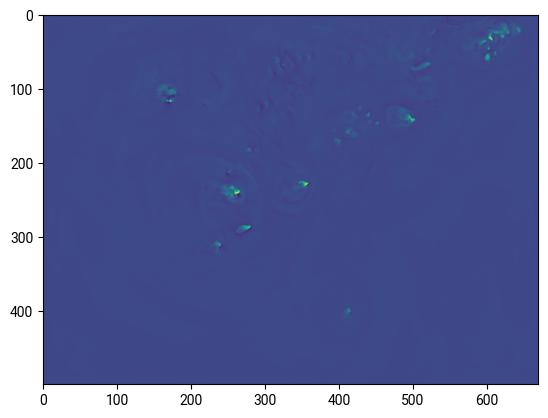

In [7]:
plt.imshow(ds_1.WP[100,:,:])

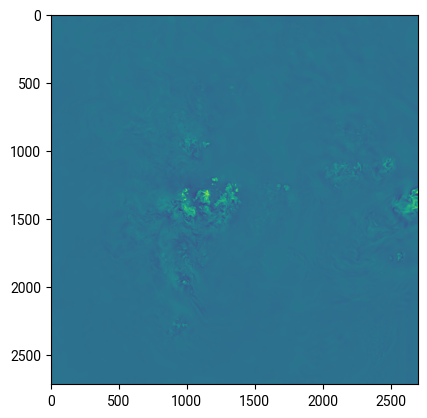

In [8]:
plt.imshow(ds_3.WP[100,:,:])

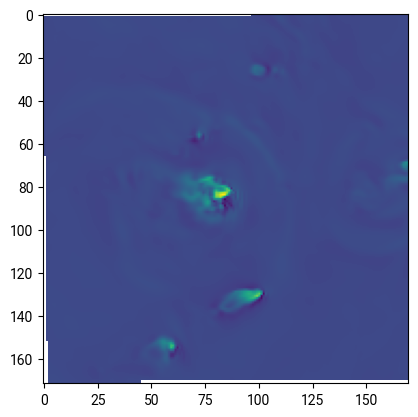

In [9]:
plt.imshow(aaa[100,:,:])